In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from pprint import pprint
import pickle
import time
import datetime
%matplotlib inline
from setting import *

NoiseModel:
  Basis gates: ['cx', 'cz', 'h', 'id', 'rx', 'rz', 's', 'sdg', 'sx', 'u1', 'u2', 'u3', 'x']
  Instructions with noise: ['s', 'rz', 'cx', 'h', 'u3', 'cz', 'rx', 'u1', 'sx', 'sdg', 'u2', 'x']
  All-qubits errors: ['rx', 'rz', 'sx', 'h', 'sdg', 's', 'x', 'u1', 'u2', 'u3', 'cx', 'cz']



In [2]:
with open("run_trotter_"+str(num_qubits)+"-qubit_trotter.pkl", "rb") as f:
    run_trotter_5_qubit_trotter = pickle.load(f)
with open("run_trotter_"+str(num_qubits)+"-qubit_proposed.pkl", "rb") as f:
    run_trotter_5_qubit_proposed = pickle.load(f)

In [3]:
fidelities_trotter = run_trotter_5_qubit_trotter["fidelities"]
nums_cnots_trotter = run_trotter_5_qubit_trotter["nums_cnots"]

In [4]:
fidelities_proposed = run_trotter_5_qubit_proposed["fidelities"]
nums_cnots_proposed = run_trotter_5_qubit_proposed["nums_cnots"]

In [5]:
num_steps_list = np.array(num_steps_list)

<Figure size 640x480 with 0 Axes>

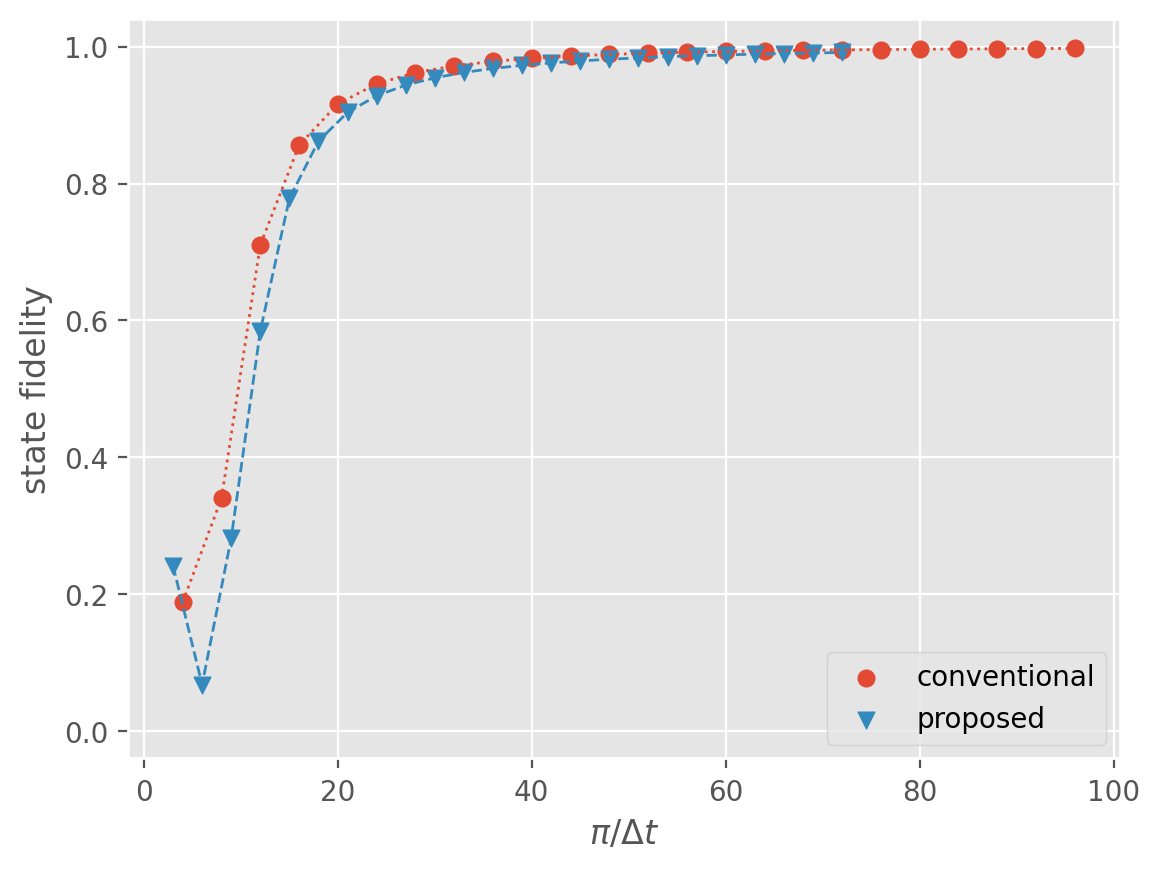

In [6]:
plt.clf()
plt.figure(dpi=200)
p1 = plt.scatter(num_steps_list, fidelities_trotter, marker="o")
plt.plot(num_steps_list, fidelities_trotter,linewidth=1, linestyle='dotted')
p2 = plt.scatter(num_steps_list * 3/4, fidelities_proposed, marker="v")
plt.plot(num_steps_list * 3/4, fidelities_proposed,linewidth=1, linestyle='dashed')
# plt.scatter(num_steps_list[:limit], e2d2_fidelities[:limit], marker="x")
plt.xlabel(r"$\pi/\Delta t$")
plt.ylabel("state fidelity")
plt.ylim(bottom=-0.04,top=1.04)
plt.legend([p1, p2], ["conventional", "proposed"]) # , "shallow encoding and shallow decoding"))
plt.show()
# plt.title("The effect of encoding and decoding strategy")

<Figure size 640x480 with 0 Axes>

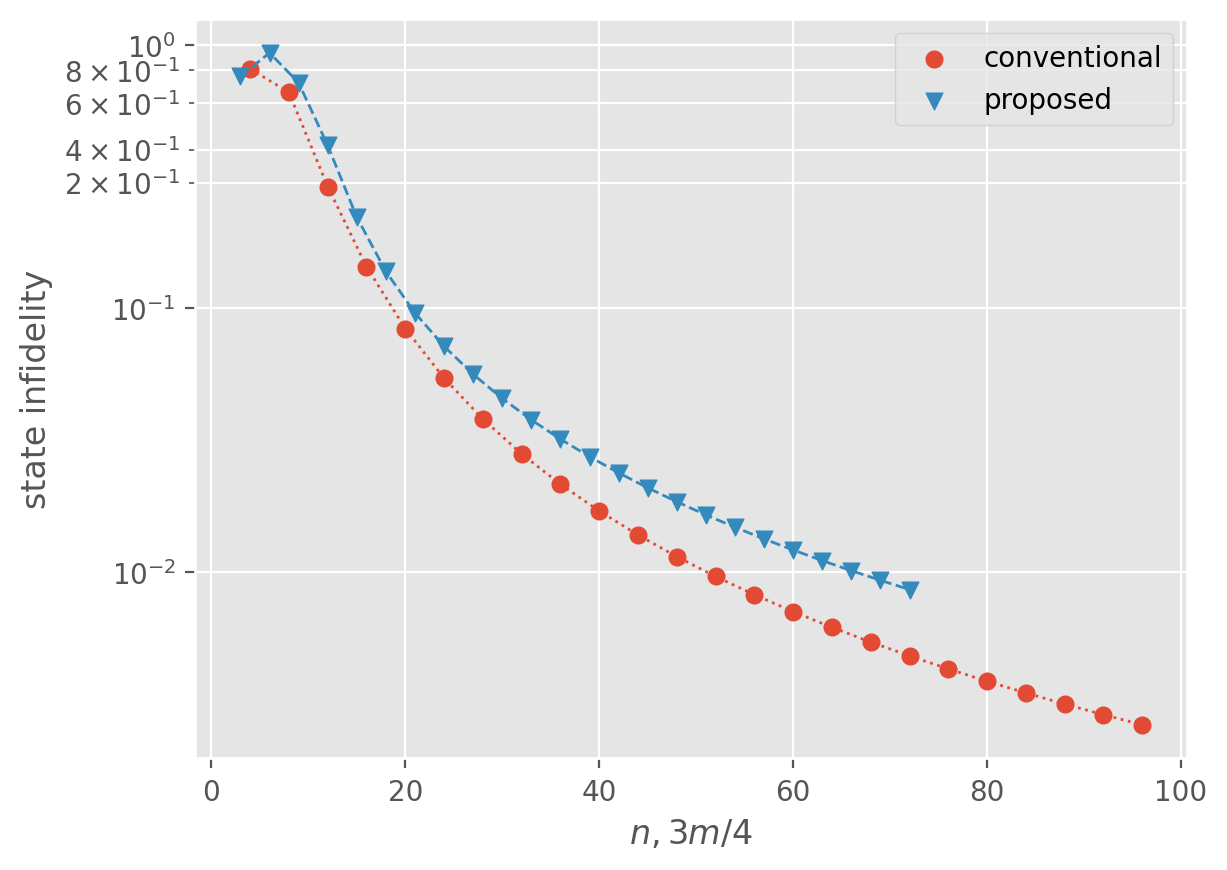

In [7]:
plt.clf()
plt.figure(dpi=200)
p1 = plt.scatter(num_steps_list, 1 - np.array(fidelities_trotter), marker="o")
plt.plot(num_steps_list, 1 - np.array(fidelities_trotter),linewidth=1, linestyle='dotted')
p2 = plt.scatter(num_steps_list * 3/4, 1 - np.array(fidelities_proposed), marker="v")
plt.plot(num_steps_list * 3/4, 1 - np.array(fidelities_proposed),linewidth=1, linestyle='dashed')
# plt.scatter(num_steps_list[:limit], e2d2_fidelities[:limit], marker="x")
# plt.xlabel(r"$\pi/\Delta t$")
plt.xlabel(r"$n, 3m/4$")
plt.ylabel("state infidelity")
plt.grid(visible=True,which="minor")
# plt.ylim(bottom=9.0 * 1e-2,top=1.1 * 1e-0)
plt.yscale("log")
plt.yticks([1e-1,3*1e-1,4*1e-1,6*1e-1,8*1e-1,1e-0],
           # [r"$1.0\times10^{-1}$",r"$2.0\times10^{-1}$",r"$4.0\times10^{-1}$",r"$6.0\times10^{-1}$",r"$8.0\times10^{-1}$",r"$1.0\times10^{0}$"],
           [r"$10^{-1}$",r"$2\times10^{-1}$",r"$4\times10^{-1}$",r"$6\times10^{-1}$",r"$8\times10^{-1}$",r"$10^{0}$"],
           minor=True)
plt.legend([p1, p2], ["conventional", "proposed"]) # , "shallow encoding and shallow decoding"))
plt.show()
# plt.title("The effect of encoding and decoding strategy")

<Figure size 640x480 with 0 Axes>

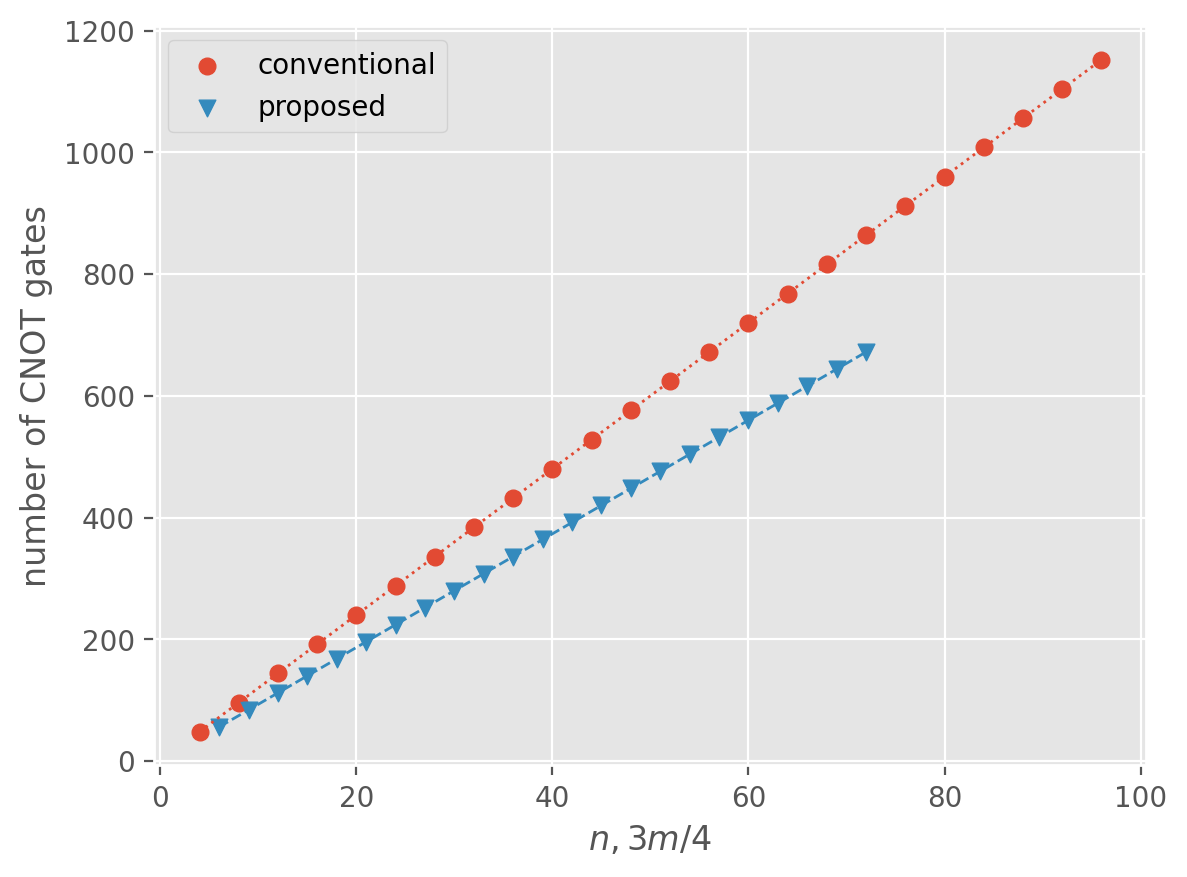

In [8]:
plt.clf()
plt.figure(dpi=200)
p1 = plt.scatter(num_steps_list, nums_cnots_trotter, marker="o")
plt.plot(num_steps_list, nums_cnots_trotter,linewidth=1, linestyle='dotted')
p2 = plt.scatter(num_steps_list * 3/4, nums_cnots_proposed, marker="v")
plt.plot(num_steps_list * 3/4, nums_cnots_proposed,linewidth=1, linestyle='dashed')
# plt.xlabel(r"$\pi/\Delta t$")
plt.xlabel(r"$n, 3m/4$")
plt.ylabel("number of CNOT gates")
# plt.ylim(bottom=-0.04,top=1.04)
plt.legend([p1, p2], ["conventional", "proposed"])
plt.show()
# plt.title("The effect of encoding and decoding strategy")

<Figure size 640x480 with 0 Axes>

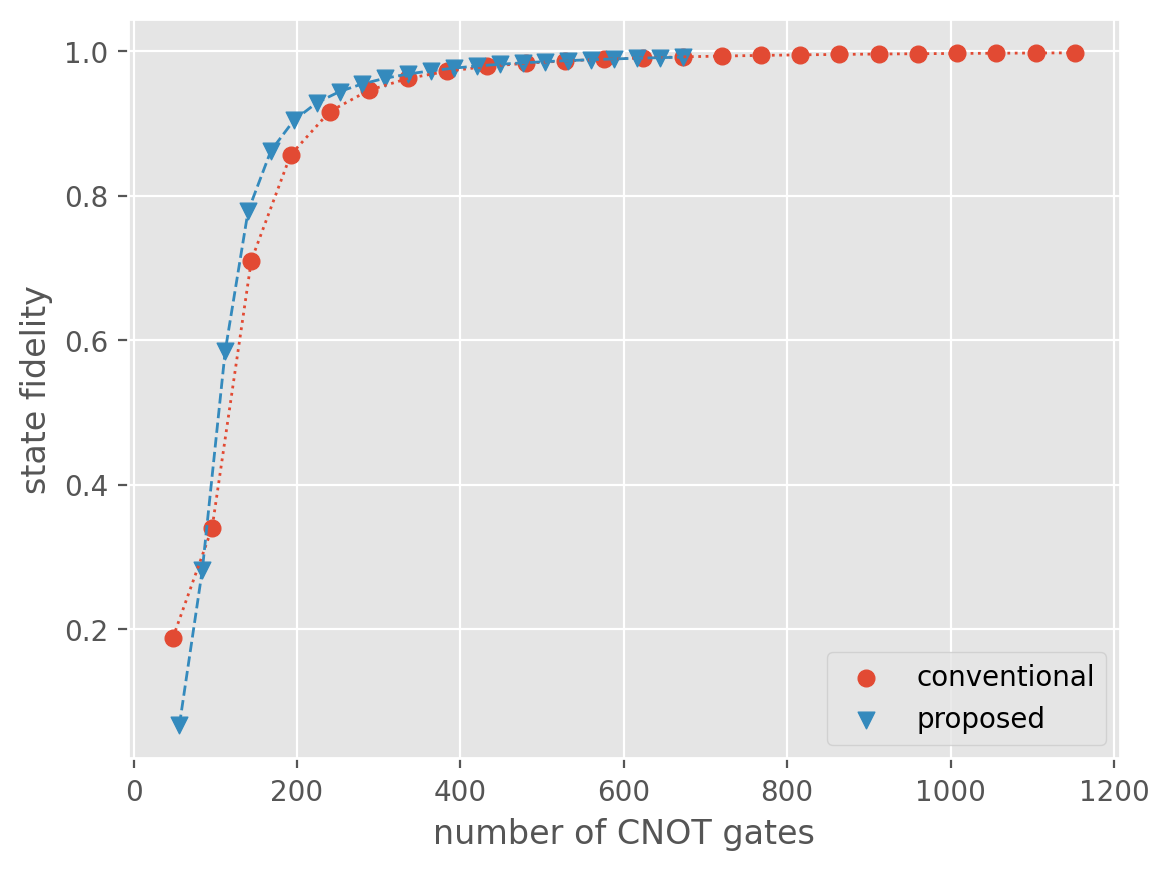

In [9]:
plt.clf()
plt.figure(dpi=200)
p1 = plt.scatter(nums_cnots_trotter, fidelities_trotter, marker="o")
plt.plot(nums_cnots_trotter, fidelities_trotter, linewidth=1, linestyle='dotted')
p2 = plt.scatter(nums_cnots_proposed, fidelities_proposed, marker="v")
plt.plot(nums_cnots_proposed, fidelities_proposed, linewidth=1, linestyle='dashed')
plt.xlabel("number of CNOT gates")
plt.ylabel("state fidelity")
# plt.ylim(bottom=-0.04,top=1.04)
plt.legend([p1, p2], ["conventional", "proposed"])
plt.show()
# plt.title("The effect of encoding and decoding strategy")

<Figure size 640x480 with 0 Axes>

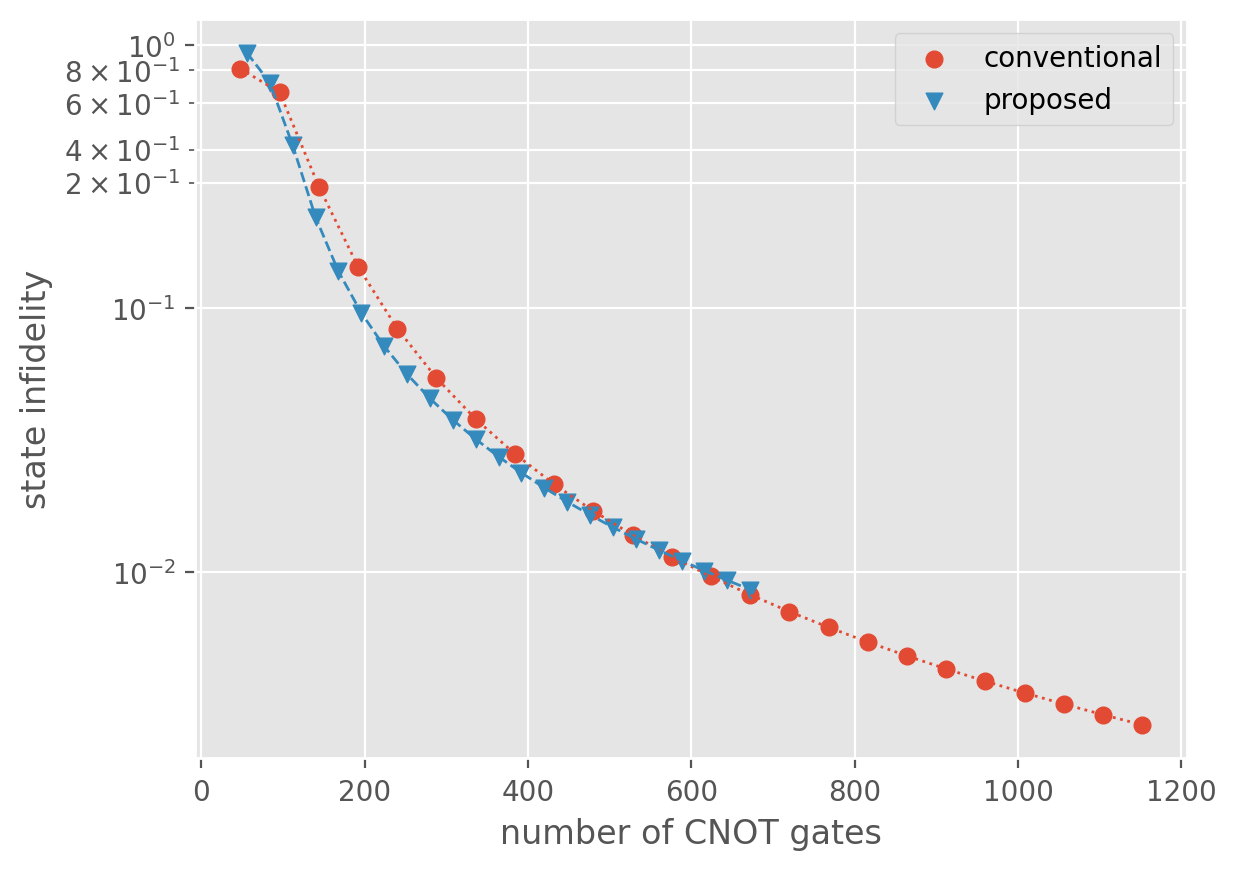

In [10]:
plt.clf()
plt.figure(dpi=200)
p1 = plt.scatter(nums_cnots_trotter, 1 - np.array(fidelities_trotter), marker="o")
plt.plot(nums_cnots_trotter, 1 - np.array(fidelities_trotter),linewidth=1, linestyle='dotted')
p2 = plt.scatter(nums_cnots_proposed, 1 - np.array(fidelities_proposed), marker="v")
plt.plot(nums_cnots_proposed, 1 - np.array(fidelities_proposed),linewidth=1, linestyle='dashed')
plt.xlabel("number of CNOT gates")
plt.ylabel("state infidelity")
plt.grid(visible=True,which="minor")
# plt.ylim(bottom=9.0 * 1e-2,top=1.1 * 1e-0)
plt.yscale("log")
plt.yticks([1e-1,3*1e-1,4*1e-1,6*1e-1,8*1e-1,1e-0],
           # [r"$1.0\times10^{-1}$",r"$2.0\times10^{-1}$",r"$4.0\times10^{-1}$",r"$6.0\times10^{-1}$",r"$8.0\times10^{-1}$",r"$1.0\times10^{0}$"],
           [r"$10^{-1}$",r"$2\times10^{-1}$",r"$4\times10^{-1}$",r"$6\times10^{-1}$",r"$8\times10^{-1}$",r"$10^{0}$"],
           minor=True)
plt.legend([p1, p2], ["conventional", "proposed"]) # , "shallow encoding and shallow decoding"))
plt.show()
# plt.title("The effect of encoding and decoding strategy")

In [11]:
max(fidelities_trotter), max(fidelities_proposed)

(0.9973730882062816, 0.9914312788729285)